# Name : Biswajit Kar
# Reg.No : 23MSD7017

# Topic: Sentiment Analysis with LSTM 
***(Using a LSTM model to classify movie reviews as positive or negative using the IMDb dataset. Comparing its performance with a CNN-based model.)***

### Importiong Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
sns.set()

[nltk_data] Error loading punkt: <urlopen error [Errno 2] No such file
[nltk_data]     or directory>


### Importing the Dataset

I have downloaded the dataset from kaggle, having 50k movie reviews.

In [2]:
imdb_ds = pd.read_csv(r"C:\Users\BISWAJIT\Downloads\IMDB\IMDB Dataset.csv")

In [3]:
imdb_ds.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Distribution of target variable

In [4]:
imdb_ds.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Factoring Sentences into words

In [5]:
text = imdb_ds['review'][0]
token = word_tokenize(text)

print(text)
print("=================================================================================================")
print("=================================================================================================")
print(token)

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [6]:
corpus = []

for i in imdb_ds['review']:
    words = [i.lower() for i in token]
    corpus.append(words)

In [7]:
num_words = len(corpus)
print(num_words)

50000


### Deviding the data into 80% train and 20% test data

In [8]:
train_size = int(imdb_ds.shape[0] * 0.8)
x_train = imdb_ds.review[:train_size]
y_train = imdb_ds.sentiment[:train_size]

x_test = imdb_ds.review[train_size:]
y_test = imdb_ds.sentiment[train_size:]

In [9]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)

In [10]:
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen=128, truncating='post', padding='post')

x_train[0], len(x_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [11]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen=128, truncating='post', padding='post')

x_test[0], len(x_test[0])

(array([   87,   122,    10,   180,     5,   132,    12,    10,  7131,
         3717,    20,     1,  1001,  2285,     2,    10,   255,     1,
           17,  2431,    10,  1311,     5,   103,     1,   222,  6349,
            4,     3,    19,    11,    17,   974,     3,   351,     5,
          215,  1011,   415,     9,    13,   215,  1380,    56,   235,
          402,   300,     4,   316,    23,   257,    19,   961,    12,
        22250,    12,    33,    66,    61,   212,    53,    16,    11,
          113,    13,   497,     2,     1,   102,    70,  5358,    15,
            1,    88,   172,     1,   473,   824,     8,     1,    64,
           67,    54,    49,  2406,    30,    29,    33,    90,    40,
        35787,    83,    46,   438,     4,     3,    74,   220,     2,
           10,   115,    21,    63,    12,    30,    29,   268,    10,
         1059,   137,    10,    78,    21,   119,    28,    13,     1,
           88,   175,     5,   728,  3423,   108,     8,     1,    17,
      

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 128) (40000,)
(10000, 128) (10000,)


## Fit a LSTM model

In [13]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 100,
                   input_length = 128, trainable = True))
model.add(LSTM(100, dropout=0.1, return_sequences = True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 128, 100)          5000000   
_________________________________________________________________
lstm (LSTM)                  (None, 128, 100)          80400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 5,160,901
Trainable params: 5,160,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Convert labels from strings to integers
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Ensure input features are floats
x_train = x_train.astype(float)
x_test = x_test.astype(float)

# Now fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 56s 66ms/step - loss: 0.4450 - accuracy: 0.7890 - val_loss: 0.3466 - val_accuracy: 0.8552
Epoch 2/10
625/625 [==============================] - 41s 65ms/step - loss: 0.2786 - accuracy: 0.8917 - val_loss: 0.3554 - val_accuracy: 0.8495
Epoch 3/10
625/625 [==============================] - 38s 61ms/step - loss: 0.1807 - accuracy: 0.9348 - val_loss: 0.3865 - val_accuracy: 0.8573
Epoch 4/10
625/625 [==============================] - 37s 59ms/step - loss: 0.1253 - accuracy: 0.9561 - val_loss: 0.4489 - val_accuracy: 0.8511
Epoch 5/10
625/625 [==============================] - 38s 60ms/step - loss: 0.1246 - accuracy: 0.9536 - val_loss: 0.4813 - val_accuracy: 0.8462
Epoch 6/10
625/625 [==============================] - 34s 55ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.5718 - val_accuracy: 0.8437
Epoch 7/10
625/625 [==============================] - 33s 53ms/step - loss: 0.0461 - accuracy: 0.9855 - val_loss: 0.5819 - val_accuracy:

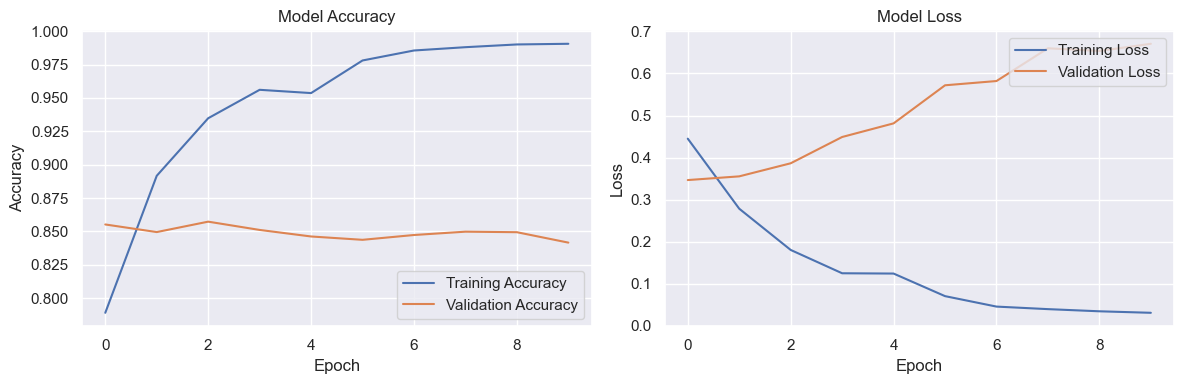

In [15]:
# Plot the Accuracy and loss values

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

**Training Loss and Accuracy:** The model’s training loss consistently decreases, and training accuracy increases with each epoch. This indicates that the model is learning from the data and optimizing its weights effectively.
Starting from an accuracy of 78.9% and a loss of 0.4450, the model reaches an accuracy of 99.05% and a very low loss of 0.0314 by the 10th epoch.

**Validation Loss and Accuracy:** The validation accuracy is fairly stable, staying around 84-85%, but validation loss starts to increase after the second epoch.
In early epochs (1–3), the validation loss is low, indicating a good fit. However, as training progresses, the validation loss begins to rise, which is a sign of overfitting. By the 10th epoch, the validation loss has risen to 0.6704.

The divergence between training and validation performance suggests overfitting, as the model has learned patterns specific to the training data but not generalizable to unseen data. By around epoch 3, the training loss continues to decrease, but the validation loss increases, indicating that the model is capturing noise rather than meaningful patterns.

## Fit a CNN based model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam


cnn_model = Sequential()

cnn_model.add(Embedding(input_dim=num_words, output_dim=100, input_length=128))

cnn_model.add(Conv1D(128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Model Summary
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 128, 100)          5000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 128)          64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 5,080,769
Trainable params: 5,080,769
Non-trainable params: 0
____________________________________________

In [19]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 0.4222 - accuracy: 0.7976 - val_loss: 0.3162 - val_accuracy: 0.8659
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.1779 - accuracy: 0.9325 - val_loss: 0.3581 - val_accuracy: 0.8577
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0287 - accuracy: 0.9927 - val_loss: 0.4254 - val_accuracy: 0.8637
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.5118 - val_accuracy: 0.8670
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 8.3072e-04 - accuracy: 0.9999 - val_loss: 0.5507 - val_accuracy: 0.8662
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 1.8228e-04 - accuracy: 1.0000 - val_loss: 0.5777 - val_accuracy: 0.8696
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 9.6525e-05 - accuracy: 1.0000 - val_loss: 0.6038 - val_accuracy: 

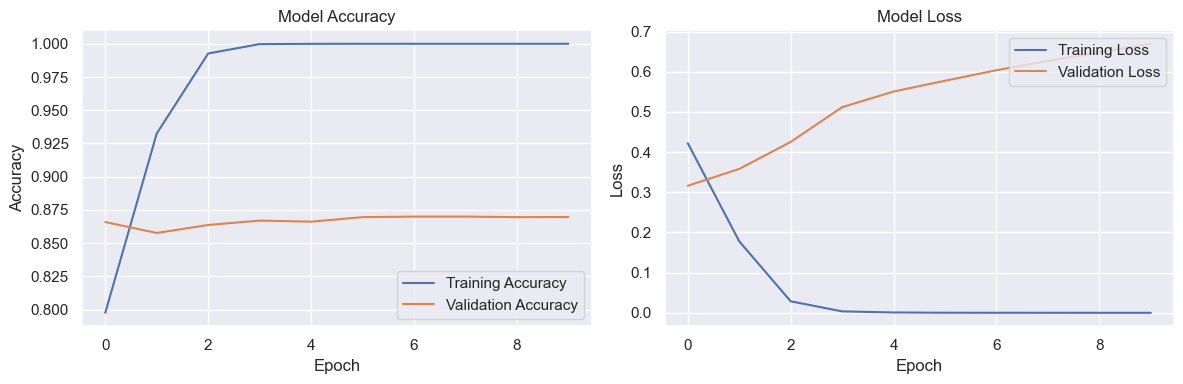

In [20]:
# Plot the Accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

**Training Accuracy:** The training accuracy started at 79.76% in the first epoch and reached 100% by the 4th epoch, staying at 100% for the rest of the training. This rapid improvement shows that the model is fitting the training data exceptionally well.

**Validation Accuracy:** The validation accuracy started at 86.59% and remained around 86-87% through all epochs. Despite the training accuracy reaching 100%, the validation accuracy remains relatively stable, indicating the model isn’t improving on new, unseen data.

**Training Loss:** The training loss decreased from 0.4222 to extremely low values close to 0 by the last epoch. This steep decline in training loss is a sign that the model is learning to classify the training data perfectly.

**Validation Loss:** The validation loss initially decreased from 0.3162 to 0.3581, then gradually increased over the epochs, ending at 0.6696. This gradual increase, even as the validation accuracy remains stable, suggests the model might be overfitting.

A typical indicator of overfitting is when the training accuracy continues to improve (reaching 100% here) while validation accuracy stagnates or improves minimally and validation loss begins to increase. This suggests the model is memorizing patterns in the training data that don’t generalize well to new data.

## Model evaluation & Comparison

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model, x_test, y_test):
    
    # Predict probabilities on the test set
    y_pred_prob = model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_prob.round())
    precision = precision_score(y_test, y_pred_prob.round())
    recall = recall_score(y_test, y_pred_prob.round())
    f1 = f1_score(y_test, y_pred_prob.round())
    
    # Print metrics
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
    }

In [34]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "LSTM Model": evaluate_model(model, x_test, y_test),
    "CNN Model":  evaluate_model(cnn_model, x_test, y_test)
})

# Transpose the DataFrame to have models as rows and metrics as columns
comparison_df

Accuracy: 0.8416
Precision: 0.8677
Recall: 0.8067
F1 Score: 0.8361
Accuracy: 0.8697
Precision: 0.8640
Recall: 0.8780
F1 Score: 0.8709


,LSTM Model,CNN Model
accuracy,0.841600,0.869700
precision,0.867669,0.863994
recall,0.806671,0.877971
f1_score,0.836059,0.870926


**Accuracy:** CNN has a higher accuracy, suggesting it performs better overall in correct classification.

**Precision:** LSTM has a slightly higher precision, indicating it makes fewer false positive predictions than CNN.

**Recall:** CNN has a notably higher recall, suggesting it captures more of the positive cases and makes fewer false negatives.

**F1 Score:** CNN’s F1 score is higher, indicating a better balance between precision and recall.

### Summary:

**LSTM:** Shows slightly better precision, meaning it is better at correctly identifying positive reviews without mistakenly labeling negative reviews as positive. However, it has a lower recall, suggesting it misses more positive cases than the CNN model.


**CNN:** Outperforms the LSTM in accuracy, recall, and F1 score. This suggests that CNN is more balanced and captures positive cases more effectively, while maintaining decent precision.

## Testing some sentences to predict the sentiment

In [65]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(input_text, model, tokenizer, max_len=128):
    
    # Tokenize the input sentence
    tokenized_text = tokenizer.texts_to_sequences([input_text])
    
    # Pad the sequence to match the input length of the model
    padded_text = pad_sequences(tokenized_text, maxlen=max_len, truncating='post', padding='post')
    
    # Predict the probability of the sentence being positive
    predicted_prob = model.predict(padded_text)[0][0]
    
    # Calculate percentages for positive and negative
    positive_percent = predicted_prob * 100
    negative_percent = (1 - predicted_prob) * 100
    
    # Print the original sentence and formatted sentiment probabilities
    print(f"{positive_percent:.2f}% positive and {negative_percent:.2f}% negative.")

#### Sentence 1 : "This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all."

In [66]:
## LSTM model

validation_sentence = "This movie was not good at all. It had some good parts like the acting was pretty good but the story was not impressing at all."
predict_sentiment(validation_sentence, model, tokenizer)

17.39% positive and 82.61% negative.


In [67]:
## CNN model

predict_sentiment(validation_sentence, cnn_model, tokenizer)

63.60% positive and 36.40% negative.


#### Sentence 2 : "The cinematography was beautiful, but the pacing of the movie was too slow for my liking."

In [68]:
## LSTM model

validation_sentence = "The cinematography was beautiful, but the pacing of the movie was too slow for my liking."
predict_sentiment(validation_sentence, model, tokenizer)

17.33% positive and 82.67% negative.


In [69]:
## CNN model

predict_sentiment(validation_sentence, cnn_model, tokenizer)

0.01% positive and 99.99% negative.


#### Sentence 3 : "I liked the music, but the rest of the movie was just okay."

In [70]:
## LSTM model
validation_sentence = "I liked the music, but the rest of the movie was just okay."
predict_sentiment(validation_sentence, model, tokenizer)

17.34% positive and 82.66% negative.


In [71]:
## CNN model
predict_sentiment(validation_sentence, cnn_model, tokenizer)

0.00% positive and 100.00% negative.


#### Sentence 4 : "Not worth the time. It was a letdown from start to finish."

In [72]:
## LSTM model
validation_sentence = "Not worth the time. It was a letdown from start to finish."
predict_sentiment(validation_sentence, model, tokenizer)

17.37% positive and 82.63% negative.


In [73]:
## CNN model
predict_sentiment(validation_sentence, cnn_model, tokenizer)

0.16% positive and 99.84% negative.


#### Sentence 5 : "I absolutely loved every moment of this film; it was so inspiring and beautiful."

In [74]:
## LSTM model
validation_sentence = "I absolutely loved every moment of this film; it was so inspiring and beautiful."  
predict_sentiment(validation_sentence, model, tokenizer)

96.03% positive and 3.97% negative.


In [75]:
## CNN model
predict_sentiment(validation_sentence, cnn_model, tokenizer)

100.00% positive and 0.00% negative.


# Conclusion:

In this task, we implemented and compared two deep learning models, an LSTM and a CNN, to classify IMDb movie reviews as positive or negative. Both models were trained on the same dataset and evaluated across key metrics, including accuracy, precision, recall, and F1-score, to determine which model provides a more effective solution for sentiment analysis on this dataset.

The CNN model outperformed the LSTM model in accuracy, recall, and F1 score, demonstrating a more balanced performance for both positive and negative reviews. This indicates that the CNN model was better able to generalize to the unseen test data, achieving a higher overall classification accuracy and capturing positive cases more effectively. While the LSTM achieved slightly higher precision, suggesting it was slightly more conservative with positive predictions, it had a lower recall, indicating that it missed more positive reviews.

The comparison highlights the CNN's ability to capture local features and hierarchical patterns in text effectively, which proves beneficial for sentiment analysis in this task. The LSTM, while useful for understanding sequence dependencies, may have been less effective due to potential overfitting or a need for further tuning.